[Original author](https://designwith.ml/assets/docs/Meetup_clustering_sample)  
  
Clustering meetup.com data! Using the location and group information to cluster the members into 6 clusters - but it is up to you to figure out what they mean!  

Data was on Kaggle.

In [9]:
#these are all of the libraries i'll be using - and I load the groups.csv data
import pandas as pd
import numpy as np
import random
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [10]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [11]:
import pandas as pd

df = pd.read_csv("E:/Master/ADC/14.Machine_Learning/ubb-sociology-ml/Data/groups.csv")

# Data Step
This step we're going to look at our dataframes and become familiar with what's in them.

In [12]:
#this is what the groups.csv looks like as a dataframe - it is about the groups
df.head()

group_id  category_id          category.name     category.shortname  \
0      6388           14       health/wellbeing       health-wellbeing   
1      6510            4  community/environment  community-environment   
2      8458           26           pets/animals           pets-animals   
3      8940           29         sci-fi/fantasy         sci-fi-fantasy   
4     10104           26           pets/animals           pets-animals   

   city_id      city country              created  \
0    10001  New York      US  2002-11-21 16:50:46   
1    10001  New York      US  2003-05-20 14:48:54   
2    10001  New York      US  2004-03-27 09:55:41   
3    10001  New York      US  2002-11-16 04:49:16   
4    10001  New York      US  2003-10-22 21:39:49   

                                         description  \
0  Those who practice or hold a strong interest i...   
1  The New York Alternative Energy Meetupis for t...   
2                                          not_found   
3  Welcome to the The New York City Anime Meetup ...   
4  We welcome those who support pits, even if you...   

              group_photo.base_url  ...  \
0  https://secure.meetupstatic.com  ...   
1  https://secure.meetupstatic.com  ...   
2  https://secure.meetupstatic.com  ...   
3  https://secure.meetupstatic.com  ...   
4  https://secure.meetupstatic.com  ...   

                          organizer.photo.photo_link  \
0  https://secure.meetupstatic.com/photos/member/...   
1  https://secure.meetupstatic.com/photos/member/...   
2  https://secure.meetupstatic.com/photos/member/...   
3  https://secure.meetupstatic.com/photos/member/...   
4  https://secure.meetupstatic.com/photos/member/...   

                          organizer.photo.thumb_link organizer.photo.type  \
0  https://secure.meetupstatic.com/photos/member/...               member   
1  https://secure.meetupstatic.com/photos/member/...               member   
2  https://secure.meetupstatic.com/photos/member/...               member   
3  https://secure.meetupstatic.com/photos/member/...               member   
4  https://secure.meetupstatic.com/photos/member/...               member   

  rating state    timezone                    urlname utc_offset  \
0   4.39    NY  US/Eastern     alternative-health-nyc     -14400   
1   4.31    NY  US/Eastern  alternative-energy-meetup     -14400   
2   4.84    NY  US/Eastern                    Animals     -14400   
3   4.46    NY  US/Eastern                  NYC-Anime     -14400   
4   4.09    NY  US/Eastern                NYC-Pitbull     -14400   

       visibility                            who  
0          public            Explorers of Health  
1          public        Clean Energy Supporters  
2          public                  Animal Voices  
3          public                     Anime Fans  
4  public_limited  NYC Pits & People, Dog Lovers  

[5 rows x 36 columns]

In [14]:
#this is the df about the members
df2 = pd.read_csv("E:/Master/ADC/14.Machine_Learning/ubb-sociology-ml/Data/members.csv", encoding = "ISO-8859-1" , nrows=1600133) #  This encoding is commonly used for Western European languages and is a single-byte encoding that can represent a wide range of characters, including characters with accents and diacritics.

In [15]:
df2.shape

(1600133, 14)

In [16]:
df2.head()

member_id                                                bio      city  \
0          3                                          not_found  New York   
1          3                                          not_found  New York   
2          3  Hi, I'm Matt. I'm an entrepreneur who has star...  New York   
3          3  Hi, I'm Matt. I'm an entrepreneur who has star...  New York   
4          3  Hi, I'm Matt. I'm an entrepreneur who has star...  New York   

  country      hometown               joined    lat  \
0      us  New York, NY  2007-05-01 22:04:37  40.72   
1      us  New York, NY  2011-01-23 14:13:17  40.72   
2      us  New York, NY  2010-12-30 18:47:34  40.72   
3      us  New York, NY  2011-01-03 14:45:21  40.72   
4      us  New York, NY  2010-12-30 18:34:50  40.72   

                              link   lon  member_name state member_status  \
0  http://www.meetup.com/members/3 -74.0  Matt Meeker    NY        active   
1  http://www.meetup.com/members/3 -74.0  Matt Meeker    NY        active   
2  http://www.meetup.com/members/3 -74.0  Matt Meeker    NY        active   
3  http://www.meetup.com/members/3 -74.0  Matt Meeker    NY        active   
4  http://www.meetup.com/members/3 -74.0  Matt Meeker    NY        active   

               visited  group_id  
0  2009-09-18 18:32:23    490552  
1  2011-03-20 01:02:11   1474611  
2  2011-01-18 20:37:23   1490492  
3  2011-07-23 03:42:28   1515830  
4  2011-06-13 18:33:23   1574965

## Data Cleaning Phase
In this phase, we'll sample a % of the data, and then use "one hot" encoding to turn string features into numbers for our mathematical models.

In [17]:
# I am sampling to 5,000 random samples from the dataframe since it is just SOOO big! This will help my code run faster
df2_sample = df2.sample(n=5000)

In [18]:
#let's explore the df by member id and the first record number of each - what are the features we want to use?
# group a DataFrame (df2_sample) by the 'member_id' column and then select the first row within each group.
# This operation is often used to get the first entry or a representative entry for each unique member ID.
df2_sample.groupby(['member_id']).first()

bio           city country   hometown  \
member_id                                                            
2629            CTO of npm, Inc.  San Francisco      us  not_found   
8352                   not_found       New York      us  not_found   
19823                  not_found        Chicago      us  not_found   
24344                  not_found        Chicago      us  not_found   
66265                  not_found        Chicago      us    Chicago   
...                          ...            ...     ...        ...   
48442942    Hello my name is Kim       New York      us  not_found   
48487022   I'm Sam, from Denver.        Chicago      us    Chicago   
48520762               not_found       New York      us  not_found   
48531252               not_found       New York      us   San Juan   
48531532               not_found  San Francisco      us  not_found   

                        joined    lat                                    link  \
member_id                                                                       
2629       2014-01-26 21:05:56  37.75      http://www.meetup.com/members/2629   
8352       2008-01-18 21:29:56  40.75      http://www.meetup.com/members/8352   
19823      2015-02-11 16:43:37  41.89     http://www.meetup.com/members/19823   
24344      2017-07-10 02:49:08  41.94     http://www.meetup.com/members/24344   
66265      2005-12-07 17:40:04  41.80     http://www.meetup.com/members/66265   
...                        ...    ...                                     ...   
48442942   2013-01-06 16:08:54  40.76  http://www.meetup.com/members/48442942   
48487022   2012-09-25 01:51:41  41.89  http://www.meetup.com/members/48487022   
48520762   2012-10-28 17:55:46  40.75  http://www.meetup.com/members/48520762   
48531252   2015-08-04 20:57:12  40.72  http://www.meetup.com/members/48531252   
48531532   2012-05-20 22:56:52  37.76  http://www.meetup.com/members/48531532   

              lon         member_name state member_status  \
member_id                                                   
2629      -122.42               Seldo    CA        active   
8352       -73.99       Frank Purcell    NY        active   
19823      -87.63            rachel s    IL        active   
24344      -87.65             Darlene    IL        active   
66265      -87.60                Nick    IL        active   
...           ...                 ...   ...           ...   
48442942   -73.97         Kim Cornett    NY        active   
48487022   -87.63          Jack Payne    IL        active   
48520762   -73.97  Gabriele Del Prete    NY        active   
48531252   -73.99   Natalia Aranguren    NY        active   
48531532  -122.44      Amber Hatfield    CA        active   

                       visited  group_id  
member_id                                 
2629       2014-01-29 05:12:20   9122292  
8352       2008-01-18 21:29:56    399919  
19823      2017-01-13 15:47:35   1819283  
24344      2017-07-25 15:38:11  22223749  
66265      2017-03-16 14:39:53     71156  
...                        ...       ...  
48442942   2013-01-06 16:08:54   2263471  
48487022   2015-01-14 22:05:52   1034045  
48520762   2017-09-27 23:14:06   5087172  
48531252   2016-03-16 20:48:44   2582052  
48531532   2017-03-22 04:18:34   2148441  

[4755 rows x 13 columns]

df2_sample['group_id']: This extracts the 'group_id' column from the DataFrame df2_sample.  
pd.get_dummies(...): This function converts categorical variable(s) into dummy/indicator variables. In this case, it's applied to the 'group_id' column.  
prefix='group_id': This parameter adds a prefix to the newly created dummy variable columns to indicate their association with the original 'group_id'.  
  
  The resulting df2_sample_dummies DataFrame will contain new binary columns (0 or 1) for each unique value in the 'group_id' column. Each row will have a 1 in the column corresponding to its 'group_id' and 0s in the other columns.

In [19]:
#One feature I want to use is the GROUP ID - one thing that we can do is "get dummies" or "one-hot encoding" to
#turn string variables into numbers! look at it below
df2_sample_dummies = pd.get_dummies(df2_sample['group_id'], prefix = 'group_id')

In [20]:
#this is what it looks like to have "dummies" or one-hot encoded variables!
df2_sample_dummies.head()

group_id_6388  group_id_8940  group_id_12542  group_id_12907  \
963105           False          False           False           False   
90292            False          False           False           False   
969156           False          False           False           False   
467132           False          False           False           False   
1289499          False          False           False           False   

         group_id_14573  group_id_15324  group_id_18843  group_id_22211  \
963105            False           False           False           False   
90292             False           False           False           False   
969156            False           False           False           False   
467132            False           False           False           False   
1289499           False           False           False           False   

         group_id_25709  group_id_25727  ...  group_id_26053840  \
963105            False           False  ...              False   
90292             False           False  ...              False   
969156            False           False  ...              False   
467132            False           False  ...              False   
1289499           False           False  ...              False   

         group_id_26076691  group_id_26176259  group_id_26187437  \
963105               False              False              False   
90292                False              False              False   
969156               False              False              False   
467132               False              False              False   
1289499              False              False              False   

         group_id_26208120  group_id_26263635  group_id_26264263  \
963105               False              False              False   
90292                False              False              False   
969156               False              False              False   
467132               False              False              False   
1289499              False              False              False   

         group_id_26290068  group_id_26317262  group_id_26378067  
963105               False              False              False  
90292                False              False              False  
969156               False              False              False  
467132               False              False              False  
1289499              False              False              False  

[5 rows x 2698 columns]

In [21]:
#Let's combine it back to our original dataframe
df2_sample_dummies_concat = pd.concat([df2_sample, df2_sample_dummies], axis=1)

In [22]:
df2_sample_dummies_concat.head()

member_id                                                bio  \
963105    13026374  hi all I am new to New York, want to make some...   
90292      2599240                                          not_found   
969156    13103134                                          not_found   
467132     8279594                                          not_found   
1289499   24236762                                          not_found   

                  city country           hometown               joined    lat  \
963105        New York      us  Greenwich Village  2013-07-05 18:55:12  40.73   
90292    San Francisco      us          not_found  2017-02-19 01:18:02  37.74   
969156        New York      us          not_found  2010-10-01 15:09:41  40.75   
467132   San Francisco      us          not_found  2009-12-29 19:25:56  37.76   
1289499  San Francisco      us          not_found  2016-01-11 05:38:10  37.75   

                                           link     lon   member_name  ...  \
963105   http://www.meetup.com/members/13026374  -74.01      Svetlana  ...   
90292     http://www.meetup.com/members/2599240 -122.49   Steve Carey  ...   
969156   http://www.meetup.com/members/13103134  -73.99         Herry  ...   
467132    http://www.meetup.com/members/8279594 -122.44        Bill H  ...   
1289499  http://www.meetup.com/members/24236762 -122.42  Dino Haramis  ...   

        group_id_26053840 group_id_26076691 group_id_26176259  \
963105              False             False             False   
90292               False             False             False   
969156              False             False             False   
467132              False             False             False   
1289499             False             False             False   

         group_id_26187437  group_id_26208120  group_id_26263635  \
963105               False              False              False   
90292                False              False              False   
969156               False              False              False   
467132               False              False              False   
1289499              False              False              False   

         group_id_26264263  group_id_26290068  group_id_26317262  \
963105               False              False              False   
90292                False              False              False   
969156               False              False              False   
467132               False              False              False   
1289499              False              False              False   

         group_id_26378067  
963105               False  
90292                False  
969156               False  
467132               False  
1289499              False  

[5 rows x 2712 columns]

In [23]:
#let's repeat the same process for the "cities" feature
df2_sample_dummies_cities = pd.get_dummies(df2_sample_dummies_concat['city'], prefix = 'cities_')
df2_sample_dummies_concat_cities2 = pd.concat([df2_sample_dummies_concat, df2_sample_dummies_cities], axis=1)

In [24]:
df2_sample_dummies_concat_cities2.head()

member_id                                                bio  \
963105    13026374  hi all I am new to New York, want to make some...   
90292      2599240                                          not_found   
969156    13103134                                          not_found   
467132     8279594                                          not_found   
1289499   24236762                                          not_found   

                  city country           hometown               joined    lat  \
963105        New York      us  Greenwich Village  2013-07-05 18:55:12  40.73   
90292    San Francisco      us          not_found  2017-02-19 01:18:02  37.74   
969156        New York      us          not_found  2010-10-01 15:09:41  40.75   
467132   San Francisco      us          not_found  2009-12-29 19:25:56  37.76   
1289499  San Francisco      us          not_found  2016-01-11 05:38:10  37.75   

                                           link     lon   member_name  ...  \
963105   http://www.meetup.com/members/13026374  -74.01      Svetlana  ...   
90292     http://www.meetup.com/members/2599240 -122.49   Steve Carey  ...   
969156   http://www.meetup.com/members/13103134  -73.99         Herry  ...   
467132    http://www.meetup.com/members/8279594 -122.44        Bill H  ...   
1289499  http://www.meetup.com/members/24236762 -122.42  Dino Haramis  ...   

        group_id_26290068 group_id_26317262 group_id_26378067  \
963105              False             False             False   
90292               False             False             False   
969156              False             False             False   
467132              False             False             False   
1289499             False             False             False   

         cities__Chicago  cities__Chicago Ridge  cities__New York  \
963105             False                  False              True   
90292              False                  False             False   
969156             False                  False              True   
467132             False                  False             False   
1289499            False                  False             False   

         cities__North Chicago  cities__San Francisco  \
963105                   False                  False   
90292                    False                   True   
969156                   False                  False   
467132                   False                   True   
1289499                  False                   True   

         cities__South San Francisco  cities__West New York  
963105                         False                  False  
90292                          False                  False  
969156                         False                  False  
467132                         False                  False  
1289499                        False                  False  

[5 rows x 2719 columns]

In [25]:
#write it to a CSV before your kernel dies! this could be helpful if you want to use the same sample again in the future
df2_sample_dummies_concat_cities2.to_csv('members2.csv')

In [30]:
copy members2.csv "E:\Master\ADC\14.Machine_Learning\ubb-sociology-ml\Data\"

        1 file(s) copied.


## Training the model
We will use groupIDs and Cities as our main features to train the model - and since we want the data itself to group and tell us what the major groups are - we are going to use a technique called "clustering" (or k-means clustering, where k= the number of clusters). I don't know in advance what the best number of clusters will be, so I will try a bunch of different k (k= 2,4,6,8) and then see how well our clusters are performing. See below :)

In [31]:
df2_sample_dummies_concat_cities2_train = df2_sample_dummies_concat_cities2.loc[:, 'group_id_6388':'cities__West New York']
df2_sample_dummies_concat_cities2_train.head()

group_id_6388  group_id_8940  group_id_12542  group_id_12907  \
963105           False          False           False           False   
90292            False          False           False           False   
969156           False          False           False           False   
467132           False          False           False           False   
1289499          False          False           False           False   

         group_id_14573  group_id_15324  group_id_18843  group_id_22211  \
963105            False           False           False           False   
90292             False           False           False           False   
969156            False           False           False           False   
467132            False           False           False           False   
1289499           False           False           False           False   

         group_id_25709  group_id_25727  ...  group_id_26290068  \
963105            False           False  ...              False   
90292             False           False  ...              False   
969156            False           False  ...              False   
467132            False           False  ...              False   
1289499           False           False  ...              False   

         group_id_26317262  group_id_26378067  cities__Chicago  \
963105               False              False            False   
90292                False              False            False   
969156               False              False            False   
467132               False              False            False   
1289499              False              False            False   

         cities__Chicago Ridge  cities__New York  cities__North Chicago  \
963105                   False              True                  False   
90292                    False             False                  False   
969156                   False              True                  False   
467132                   False             False                  False   
1289499                  False             False                  False   

         cities__San Francisco  cities__South San Francisco  \
963105                   False                        False   
90292                     True                        False   
969156                   False                        False   
467132                    True                        False   
1289499                   True                        False   

         cities__West New York  
963105                   False  
90292                    False  
969156                   False  
467132                   False  
1289499                  False  

[5 rows x 2705 columns]

In [32]:
#k = 8 training model
km = KMeans(n_clusters=8)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters = km.labels_.tolist()
%time km.fit(df2_sample_dummies_concat_cities2_train)
silhouette_k8 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:5000], clusters[0:5000])

CPU times: total: 375 ms
Wall time: 507 ms
CPU times: total: 469 ms
Wall time: 365 ms


In [33]:
#k=6 training model
km = KMeans(n_clusters=6)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters = km.labels_.tolist()
%time km.fit(df2_sample_dummies_concat_cities2_train)
silhouette_k6 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:5000], clusters[0:5000])

CPU times: total: 359 ms
Wall time: 296 ms
CPU times: total: 328 ms
Wall time: 297 ms


In [34]:
# k = 4 training model
km = KMeans(n_clusters=4)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters = km.labels_.tolist()
%time km.fit(df2_sample_dummies_concat_cities2_train)
silhouette_k4 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:5000], clusters[0:5000])

CPU times: total: 219 ms
Wall time: 271 ms
CPU times: total: 297 ms
Wall time: 263 ms


In [35]:
# k = 2 training model
km = KMeans(n_clusters=2)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters = km.labels_.tolist()
%time km.fit(df2_sample_dummies_concat_cities2_train)
silhouette_k2 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:5000], clusters[0:5000])

CPU times: total: 266 ms
Wall time: 227 ms
CPU times: total: 453 ms
Wall time: 250 ms


## Model Evaluation


In [36]:
silhouette = [silhouette_k2, silhouette_k4, silhouette_k6, silhouette_k8]
count_k = [2, 4, 6, 8]

count_silhouette = list(zip(count_k, silhouette))
print(count_silhouette)

[(2, np.float64(0.21929631189645507)), (4, np.float64(0.29312529611711013)), (6, np.float64(0.12609140553869433)), (8, np.float64(0.005130559244719646))]


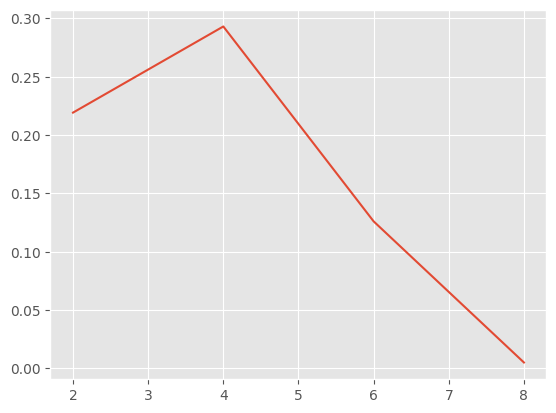

In [37]:
plt.plot(*zip(*count_silhouette))

* No Clear Elbow:
If the inertia plot doesn't show a clear elbow and the inertia decreases smoothly without a significant break point, it might be challenging to determine the optimal k based solely on this method.  
  
* Slight Elbow:
If there's a slight elbow, it suggests that adding more clusters beyond that point provides diminishing returns in terms of explaining the variance in the data.  
  
* Sharp Elbow:
If there's a sharp elbow, it indicates a more pronounced point where the addition of clusters is less beneficial. This is often considered a good candidate for the optimal number of clusters.  

  However, it's important to note that the elbow method has limitations, and the choice of k may not always be entirely clear-cut. It's often used as a heuristic rather than a strict rule. Other factors, such as domain knowledge, the context of the problem, and the specific characteristics of the data, should also be considered.

## Model Output
Now that we've decided on k=4 clusters, let's assign the cluster labels back to the original data, and make it interpretable!

In [38]:
km = KMeans(n_clusters=4)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters4 = km.labels_.tolist()
silhouette_k4 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:50000], clusters[0:50000])

CPU times: total: 266 ms
Wall time: 270 ms


In [39]:
df2_sample_dummies_concat_cities2_train.loc[:, "cluster_number"] = clusters4

In [40]:
df2_sample_dummies_concat_cities2_train.head()

group_id_6388  group_id_8940  group_id_12542  group_id_12907  \
963105           False          False           False           False   
90292            False          False           False           False   
969156           False          False           False           False   
467132           False          False           False           False   
1289499          False          False           False           False   

         group_id_14573  group_id_15324  group_id_18843  group_id_22211  \
963105            False           False           False           False   
90292             False           False           False           False   
969156            False           False           False           False   
467132            False           False           False           False   
1289499           False           False           False           False   

         group_id_25709  group_id_25727  ...  group_id_26317262  \
963105            False           False  ...              False   
90292             False           False  ...              False   
969156            False           False  ...              False   
467132            False           False  ...              False   
1289499           False           False  ...              False   

         group_id_26378067  cities__Chicago  cities__Chicago Ridge  \
963105               False            False                  False   
90292                False            False                  False   
969156               False            False                  False   
467132               False            False                  False   
1289499              False            False                  False   

         cities__New York  cities__North Chicago  cities__San Francisco  \
963105               True                  False                  False   
90292               False                  False                   True   
969156               True                  False                  False   
467132              False                  False                   True   
1289499             False                  False                   True   

         cities__South San Francisco  cities__West New York  cluster_number  
963105                         False                  False               1  
90292                          False                  False               0  
969156                         False                  False               1  
467132                         False                  False               0  
1289499                        False                  False               0  

[5 rows x 2706 columns]

In [41]:
df2_sample_dummies_concat_cities2_train["cluster_number"].value_counts()

cluster_number
1    2877
0    1312
3     806
2       5
Name: count, dtype: int64

## Tadah! We have a merged dataframe of members, clustered by their city and groups they're interested in, merged on what the group categories are (from the original groups df) and we can now export this and explore!

In [42]:
df2_sample.head()

member_id                                                bio  \
963105    13026374  hi all I am new to New York, want to make some...   
90292      2599240                                          not_found   
969156    13103134                                          not_found   
467132     8279594                                          not_found   
1289499   24236762                                          not_found   

                  city country           hometown               joined    lat  \
963105        New York      us  Greenwich Village  2013-07-05 18:55:12  40.73   
90292    San Francisco      us          not_found  2017-02-19 01:18:02  37.74   
969156        New York      us          not_found  2010-10-01 15:09:41  40.75   
467132   San Francisco      us          not_found  2009-12-29 19:25:56  37.76   
1289499  San Francisco      us          not_found  2016-01-11 05:38:10  37.75   

                                           link     lon   member_name state  \
963105   http://www.meetup.com/members/13026374  -74.01      Svetlana    NY   
90292     http://www.meetup.com/members/2599240 -122.49   Steve Carey    CA   
969156   http://www.meetup.com/members/13103134  -73.99         Herry    NY   
467132    http://www.meetup.com/members/8279594 -122.44        Bill H    CA   
1289499  http://www.meetup.com/members/24236762 -122.42  Dino Haramis    CA   

        member_status              visited  group_id  
963105         active  2013-07-05 21:40:47   5055262  
90292          active  2017-07-05 03:53:09  18325371  
969156         active  2017-02-04 02:23:01     87095  
467132         active  2015-05-25 02:49:57   1288479  
1289499        active  2017-04-08 18:29:30  19155362

In [43]:
df2_sample.loc[:, "clusters_number"] = clusters4

In [44]:
df2_sample.to_csv('members_cluster_group.csv')

In [47]:
copy members_cluster_group.csv "E:/Master/ADC/14.Machine_Learning/ubb-sociology-ml/Data/"

        1 file(s) copied.


In [48]:
df2_sample.head()

member_id                                                bio  \
963105    13026374  hi all I am new to New York, want to make some...   
90292      2599240                                          not_found   
969156    13103134                                          not_found   
467132     8279594                                          not_found   
1289499   24236762                                          not_found   

                  city country           hometown               joined    lat  \
963105        New York      us  Greenwich Village  2013-07-05 18:55:12  40.73   
90292    San Francisco      us          not_found  2017-02-19 01:18:02  37.74   
969156        New York      us          not_found  2010-10-01 15:09:41  40.75   
467132   San Francisco      us          not_found  2009-12-29 19:25:56  37.76   
1289499  San Francisco      us          not_found  2016-01-11 05:38:10  37.75   

                                           link     lon   member_name state  \
963105   http://www.meetup.com/members/13026374  -74.01      Svetlana    NY   
90292     http://www.meetup.com/members/2599240 -122.49   Steve Carey    CA   
969156   http://www.meetup.com/members/13103134  -73.99         Herry    NY   
467132    http://www.meetup.com/members/8279594 -122.44        Bill H    CA   
1289499  http://www.meetup.com/members/24236762 -122.42  Dino Haramis    CA   

        member_status              visited  group_id  clusters_number  
963105         active  2013-07-05 21:40:47   5055262                1  
90292          active  2017-07-05 03:53:09  18325371                0  
969156         active  2017-02-04 02:23:01     87095                1  
467132         active  2015-05-25 02:49:57   1288479                0  
1289499        active  2017-04-08 18:29:30  19155362                0

In [49]:
df2_sample['city'].nunique()

7

In [50]:
df2_sample['group_id'].nunique()

2698